### Part2

In part2, I've used 3 seperate notebooks because the input/output process and also the processes that involve stuff not related to Neural networks was working slowly on google colab. 

#### Notebook 1:(jupyter notebook)
In the first notebook, I've loaded that dataset, converted it into array format and saved it into a pickle file so that it can be used for Notebook 2 on google colab. The training and validation datset is uploaded in google drive


#### Notebook 2:(Google colab)
In this notebook, I've loaded the training and validation data into google colab which I had uploaded in google drive. I've defined the model, trained the data and then saved the model as 'model_densenet3'. The model was then downloaded into the local machine from google drive.


#### Notebook 3:(jupyter notebook)
Here I've loaded the model downloaded from google colab. evaluated the model on validation data so that it can be confirmed that I've used the same model trained on google colab. Here I've also predicted on the testing data and generated the file uploaded on kaggle 

### Notebook 1

In the first notebook, I've loaded that dataset, converted it into array format and saved it into a pickle file so that it can be used for Notebook 2. 

In [1]:
import PIL
import PIL.Image
import numpy as np
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
from keras import layers
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
import os

In [4]:
from tensorflow.keras.models import Sequential
from keras import regularizers, optimizers
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Loading data

#### 4. Use the train images and trainLabels.csv.

In [5]:
#loading the csv file
traindf=pd.read_csv("data/trainLabels.csv",dtype=str)

In [6]:
#Adding png to ids, so that ImageDataGenerator can map it 
def append_ext(fn):
    return fn+".png"

traindf["id"]=traindf["id"].apply(append_ext)

In [7]:
traindf

id       label
0          1.png        frog
1          2.png       truck
2          3.png       truck
3          4.png        deer
4          5.png  automobile
...          ...         ...
39995  39996.png    airplane
39996  39997.png  automobile
39997  39998.png        frog
39998  39999.png        bird
39999  40000.png        ship

[40000 rows x 2 columns]

In [8]:
#rescaling and specifying validation split 
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.1)

#tensor training data
train_ds=datagen.flow_from_dataframe(
dataframe=traindf,
directory="C:/Users/sarth/Desktop/courses/Sem 1/CMPE-257/Lab 2/train/train",
x_col="id",
y_col="label",
subset="training",
batch_size=36000,
seed=14,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

Found 36000 validated image filenames belonging to 10 classes.


In [9]:
class_names=[]
for k in train_ds.class_indices:
    class_names.append(k)

In [10]:
#class names generated by ImageDataGen
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [11]:
#tensor validation data
val_ds=datagen.flow_from_dataframe(
dataframe=traindf,
#directory will depend on your train data images local path
directory="'C:/Users/sarth/Documents/GitHub/Multi-Class-Image-Classification/Data/train/train'",
x_col="id",
y_col="label",
subset="validation",
batch_size=4000,
seed=14,
shuffle=True,
class_mode="categorical",
target_size=(32,32))

Found 4000 validated image filenames belonging to 10 classes.


In [13]:
#from tensor data generating array data 
x_train,y_train=next(train_ds)
x_test,y_test=next(val_ds)

In [14]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((36000, 32, 32, 3), (36000, 10), (4000, 32, 32, 3), (4000, 10))

In [42]:
#Saving the data so that it can be used in Notebook 2
import pickle
pickle.dump(x_train, open("pickles/x_train.pkl", "wb"))
pickle.dump(y_train, open("pickles/y_train.pkl", "wb"))
pickle.dump(x_test, open("pickles/x_test.pkl", "wb"))
pickle.dump(y_test, open("pickles/y_test.pkl", "wb"))

### Notebook 2: (Google colab)

In this notebook, I've loaded the training and validation data into google colab which I had uploaded in google drive. I've defined the model, trained the data and then saved the model as 'model_densenet3'. The model was then downloaded into the local machine from google drive.

In [3]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading the data saved in notebook 1
#Kindly load this data by specifying the path on your google drive or local storage
import pickle
infile_1=open('/content/drive/My Drive/lab2/x_train.pkl','rb')
infile_2=open('/content/drive/My Drive/lab2/y_train.pkl','rb')
infile_3=open('/content/drive/My Drive/lab2/x_test.pkl','rb')
infile_4=open('/content/drive/My Drive/lab2/y_test.pkl','rb')


x_train,y_train=pickle.load(infile_1),pickle.load(infile_2)
x_test,y_test=pickle.load(infile_3),pickle.load(infile_4)

infile_1.close()
infile_2.close()
infile_3.close()
infile_4.close()

#### 5. Using a CNN architecture of your choice train your model (make sure you validate while training).


In [11]:
#loading the base Denset121 model from tensorflow 
base = tf.keras.applications.DenseNet121(include_top=False, weights='imagenet', input_shape=(128, 128, 3))
base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 134, 134, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

#### Advantage of using DenseNet:

The major advantage of using densenet is that it concatenates the output of the previous layer with the future layer. It utilizes dense connections between layers where all layers with matching feature-map sizes are connected together. This in turn creates shorter connections between layers close to input and those close to output. 

### Retraining the model 

In [6]:
model = Sequential()
model.add(layers.UpSampling2D((2,2),input_shape=(32,32,3)))
model.add(layers.UpSampling2D((2,2)))
model.add(base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

##### The architecture besides the Densenet121 has been changed to train my model on the new dataset. The shape of the given image dataset is 32x32 and I've used the input_shape in densenet as 128x128. To make the shapes similar, I've added upsampling two times in my architecture which will make the shape from 32x32 to 64x64 to 128x128. Then to feed the data into fully connected neural network, I've flattened the processed input and added 3 dense layers with the final layers consisting of 10 neurons as we want to predict has 10 classes.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d (UpSampling2D) (None, 64, 64, 3)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 128, 128, 3)       0         
_________________________________________________________________
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 16384)             65536     
_________________________________________________________________
dense (Dense)                (None, 128)               2097280   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

#### Avoid Overfitting and produce similar data

Using ImageDataGenerator we can produce similar kind of images with our training data so that it can generalize better and avoid overfitting. 

In [7]:
datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
train_it = datagen.flow(x_train, y_train, batch_size=32)

In [13]:
#Early stopping to get the best weights 
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',patience=11,restore_best_weights=True)

In [14]:
#Training the model
history = model.fit(train_it, epochs=50, batch_size=32, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/50
1125/1125 [==============================] - 226s 152ms/step - loss: 0.8126 - acc: 0.2070 - val_loss: 0.5498 - val_acc: 0.7602
Epoch 2/50
1125/1125 [==============================] - 170s 151ms/step - loss: 0.6704 - acc: 0.5416 - val_loss: 0.4518 - val_acc: 0.8907
Epoch 3/50
1125/1125 [==============================] - 170s 151ms/step - loss: 0.5859 - acc: 0.7198 - val_loss: 0.3960 - val_acc: 0.9290
Epoch 4/50
1125/1125 [==============================] - 170s 151ms/step - loss: 0.5281 - acc: 0.7837 - val_loss: 0.3520 - val_acc: 0.9380
Epoch 5/50
1125/1125 [==============================] - 169s 151ms/step - loss: 0.4737 - acc: 0.8221 - val_loss: 0.3076 - val_acc: 0.9457
Epoch 6/50
1125/1125 [==============================] - 168s 149ms/step - loss: 0.4159 - acc: 0.8540 - val_loss: 0.2529 - val_acc: 0.9555
Epoch 7/50
1125/1125 [==============================] - 168s 149ms/step - loss: 0.3598 - acc: 0.8700 - val_loss: 0.2088 - val_acc: 0.9560
Epoch 8/50
1125/1125 [============

### Plotting the training and validation loss and accuracy

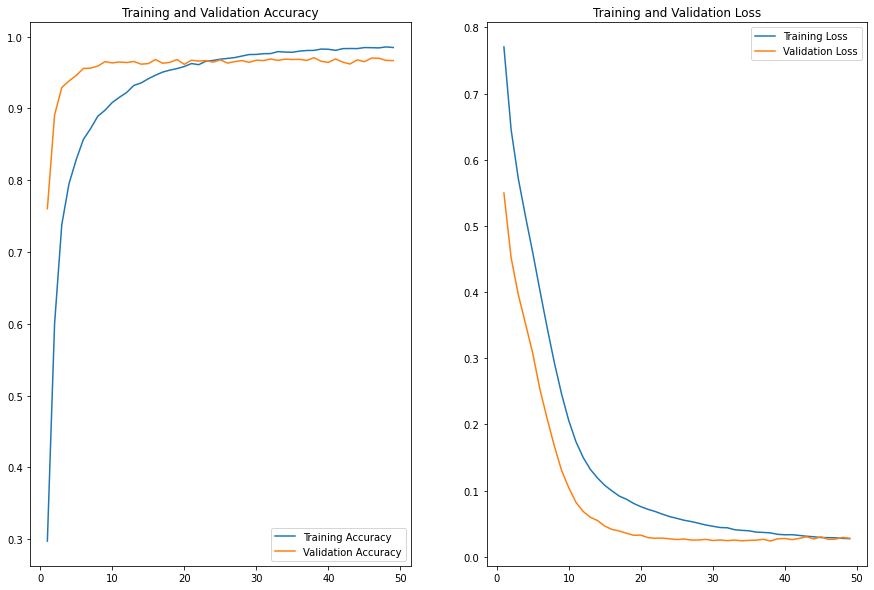

In [26]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

range1 = range(1,50)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.plot(range1, acc, label='Training Accuracy')
plt.plot(range1, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range1, loss, label='Training Loss')
plt.plot(range1, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
#saving the model for notebook3
model.save('/content/drive/My Drive/lab2/model_densenet3')

INFO:tensorflow:Assets written to: /content/drive/My Drive/lab2/model_densenet3/assets


### Notebook 3: (Jupyter notebook)

Here I've loaded the model downloaded from google colab. evaluated the model on validation data so that it can be confirmed that I've used the same model trained on google colab. Here I've also predicted on the testing data and generated the file uploaded on kaggle 

#### 6. Load test images

In [3]:
# This will depend on your local path
folder_path = 'C:/Users/sarth/Documents/GitHub/Multi-Class-Image-Classification/Data/test/test'

In [4]:
class_names=['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [6]:
#images to array 
img_arrays=[]
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = keras.preprocessing.image.load_img(img, target_size=(32, 32)) #loading image
    img_array = keras.preprocessing.image.img_to_array(img) #converting pixels into array
    img_array=img_array/255. #rescaling it 
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    img_arrays.append(img_array)
    
img_arrays = np.vstack(img_arrays)

In [8]:
img_arrays.shape

(10000, 32, 32, 3)

In [10]:
#Saving testing arrays so that we don't have to process it again and again 
import pickle
pickle.dump(img_arrays, open("test_img_arr_kaggle.pkl", "wb"))

#### 7. Run the dataset through your model and get your prediction values for test images.

The model saved in notebook 2 is downloaded on the local machine and loaded in this notebook

In [2]:
model = keras.models.load_model("model_densenet3")

In [3]:
class_names=['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [5]:
#Loading the test image arrays generated in point 6
import pickle
infile=open("test_img_arr_kaggle.pkl",'rb')
test_arrays=pickle.load(infile)
infile.close()

In [6]:
#Getting predictions in numerical data
predictions = model.predict(test_arrays)

In [7]:
#mapping them to respective class names 
final_pred=list()
for array in predictions:
    class_name=class_names[np.argmax(array)]
    final_pred.append(class_name)

#### 8. Create a table with id and corresponding predicted label. 

In [9]:
ID=range(40001,50001)
df=pd.DataFrame({'id':ID,'label':final_pred})
df=df.set_index("id")

In [10]:
df

label
id               
40001  automobile
40002        ship
40003         dog
40004  automobile
40005         dog
...           ...
49996        bird
49997        frog
49998       truck
49999  automobile
50000  automobile

[10000 rows x 1 columns]

In [11]:
df.to_csv('attempt_dense.csv')

### Evaluating the model on validation data to vertify the model is same as trained on google colab 

In [12]:
import pickle
infile_3=open('pickles/x_test.pkl','rb')
infile_4=open('pickles/y_test.pkl','rb')

x_test,y_test=pickle.load(infile_3),pickle.load(infile_4)

infile_3.close()
infile_4.close()

In [14]:
eval1=model.evaluate(x_test,y_test)

125/125 [==============================] - 77s 616ms/step - loss: 0.0370 - acc: 0.9705


In [15]:
eval1

[0.037018582224845886, 0.9704999923706055]

We can see that the accuracy on validation data is close to the google colab val_accuracy and kaggle prediction 